In [1]:
# Importing packages for ML Training
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [17]:
encodings = []
na = pd.read_csv('../Datasets/world_oceans.csv', encoding= "latin-1")

In [3]:
na.head()

,Unnamed: 0,Oceans,Microplastics Measurement (density),Unit,Concentration Class,Latitude,Longitude,Date,Water Sample Depth (m)
0,0,Arctic Ocean,0.003,pieces/m3,Low,77.3834,13.8334,16583.0,0.45
1,1,Arctic Ocean,0.009,pieces/m3,Medium,69.0302,-16.6200,16598.0,0.45
2,2,Arctic Ocean,0.005,pieces/m3,Medium,65.6830,-18.0861,16605.0,0.45
3,3,Arctic Ocean,0.007,pieces/m3,Medium,65.7056,-21.6652,16605.0,0.45
4,4,Arctic Ocean,0.008,pieces/m3,Medium,66.4346,-163.2724,16612.0,0.45


In [8]:
na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           9980 non-null   int64  
 1   Oceans                               9980 non-null   object 
 2   Microplastics Measurement (density)  9980 non-null   float64
 3   Unit                                 9980 non-null   object 
 4   Concentration Class                  9980 non-null   object 
 5   Latitude                             9980 non-null   float64
 6   Longitude                            9980 non-null   float64
 7   Date                                 9980 non-null   float64
 8   Water Sample Depth (m)               9980 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 701.8+ KB


In [9]:
#Preprocessing
X = na.iloc[:,1:2].values  # features
y = na.iloc[:,2].values  # Target variable

In [18]:
na.columns

Index(['Unnamed: 0', 'Oceans', 'Microplastics Measurement (density)', 'Unit',
       'Concentration Class', 'Latitude', 'Longitude', 'Date',
       'Water Sample Depth (m)'],
      dtype='object')

In [19]:
X = na[['Date', 'Microplastics Measurement (density)', 'Longitude', 'Latitude']]
y = na['Microplastics Measurement (density)']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [22]:
X_train

,Date,Microplastics Measurement (density),Longitude,Latitude
8335,16107.0,0.004439,138.5050,34.0000
1117,10160.0,0.038876,-64.5000,32.3500
427,8170.0,0.000000,-65.0000,39.7600
1844,11834.0,0.032396,-64.6200,33.8100
4683,18883.0,0.200767,8.2240,39.2542
...,...,...,...,...
599,8702.0,0.086392,-58.0000,22.2800
5695,12417.0,0.000000,-144.7700,31.7200
8006,15497.0,0.084603,174.9779,-19.9931
1361,10702.0,0.023760,-65.6600,33.4500


In [23]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train, y_train)
lm.coef_

array([ 6.36832113e-18,  1.00000000e+00, -1.11022302e-16, -5.55111512e-17])

In [28]:
coeff_na = pd.DataFrame(lm.coef_,X.columns, columns = ['Coefficient'])

In [29]:
coeff_na

,Coefficient
Date,6.368321e-18
Microplastics Measurement (density),1.000000e+00
Longitude,-1.110223e-16
Latitude,-5.551115e-17


In [30]:
predictions = lm.predict(X)

ValueError: x and y must be the same size

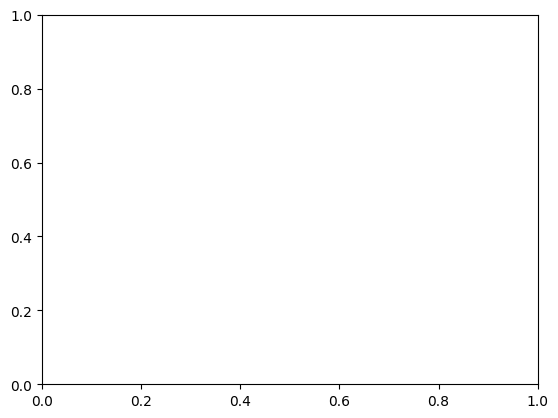

In [31]:
plt.scatter(y_test, predictions)